<center>
In the name of God
<br>
<h3>System Analysis and Design Course</h3>

<br>
<img src="Figures/kntu.png" width="50px" height="50px"/> 
<br>
K. N. Toosi University of Technology
<br>

</center>

# Monte Carlo Simulation (Part2)

## Historical data

In [1]:
import numpy as np
a=np.array([10,12,15,10,12,11,10,10,9,11,12,13,9,10,11,9])

## Distribution fitting
* Moment matching
* Maximum likelihood

## Moment matching
$m_{k}=\frac{1}{n} \sum_{i=1}^{n} x_{i}^k$

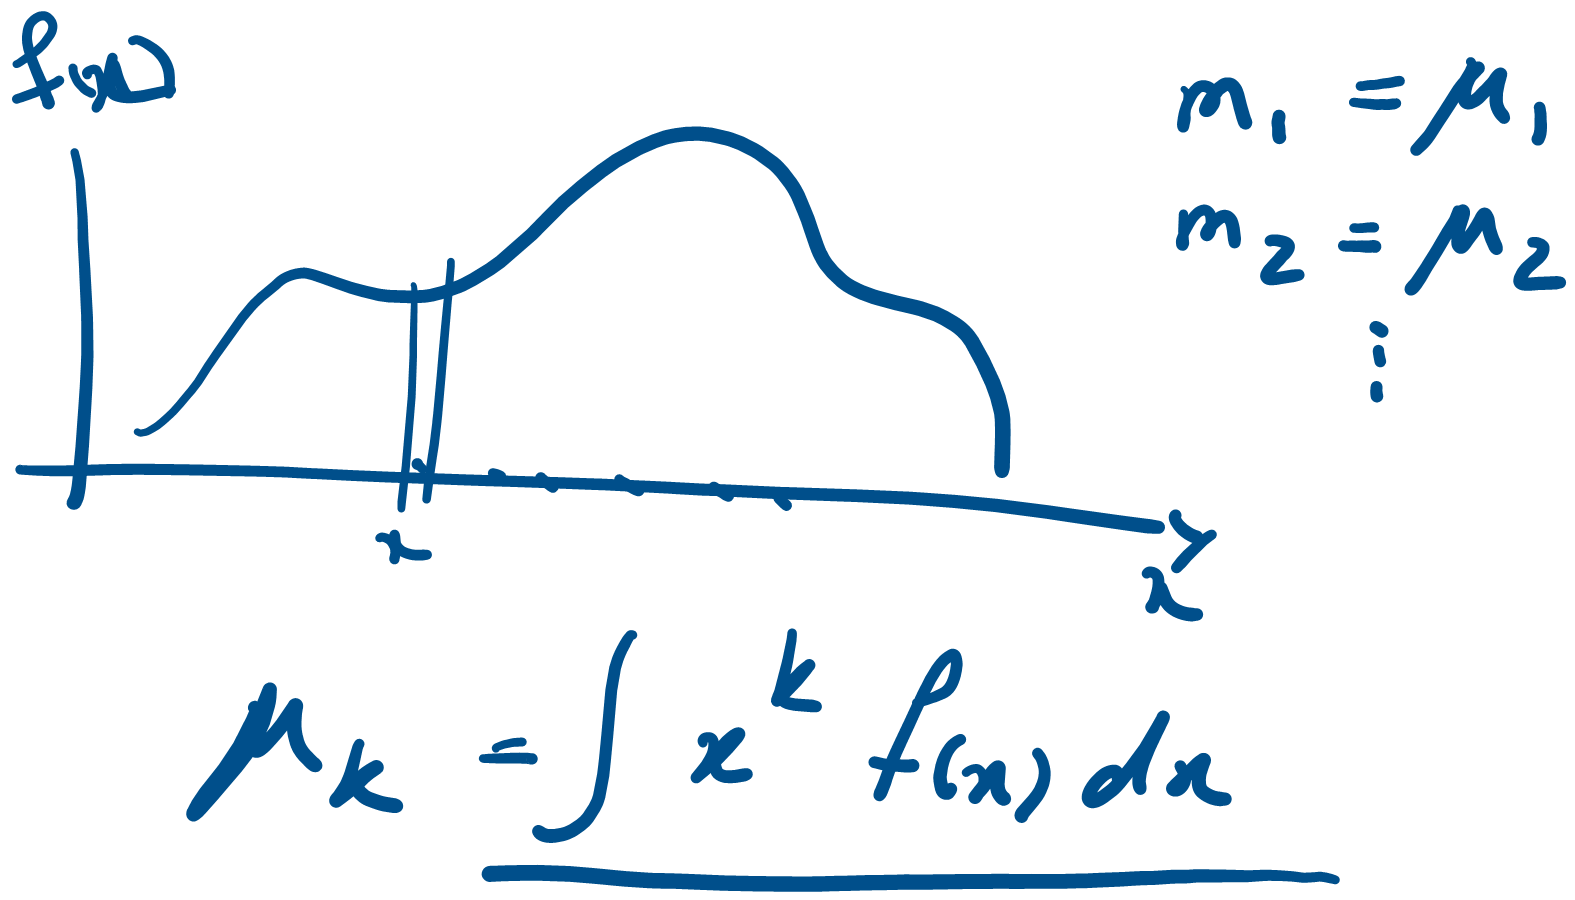

(array([3., 5., 0., 3., 0., 3., 1., 0., 0., 1.]),
 array([ 9. ,  9.6, 10.2, 10.8, 11.4, 12. , 12.6, 13.2, 13.8, 14.4, 15. ]),
 <BarContainer object of 10 artists>)

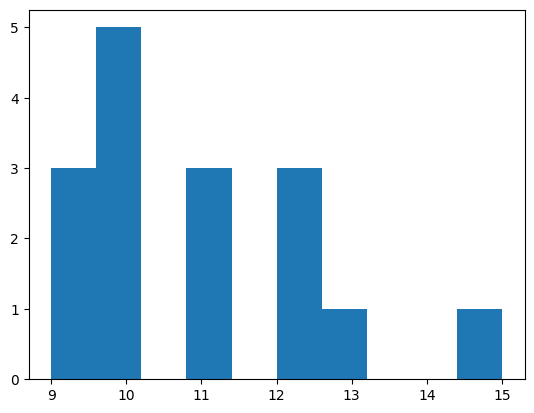

In [8]:
import matplotlib.pyplot as plt
plt.hist(a)

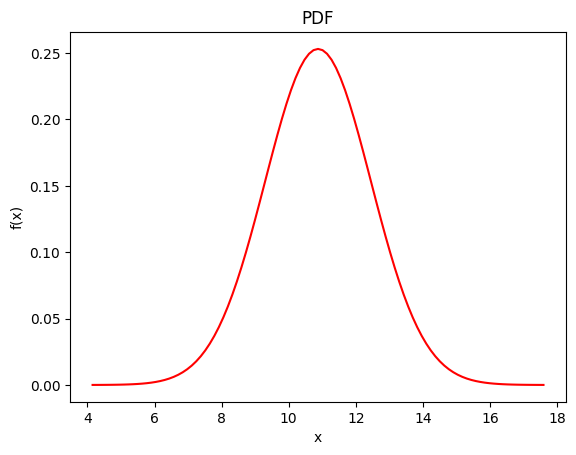

<module 'matplotlib.pyplot' from 'c:\\Users\\naima\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
import simpm.dist as dist
mean=np.mean(a)
std=np.std(a)
mydistribution=dist.norm(mean,std)
mydistribution.plot_pdf()


## maximum likelihood
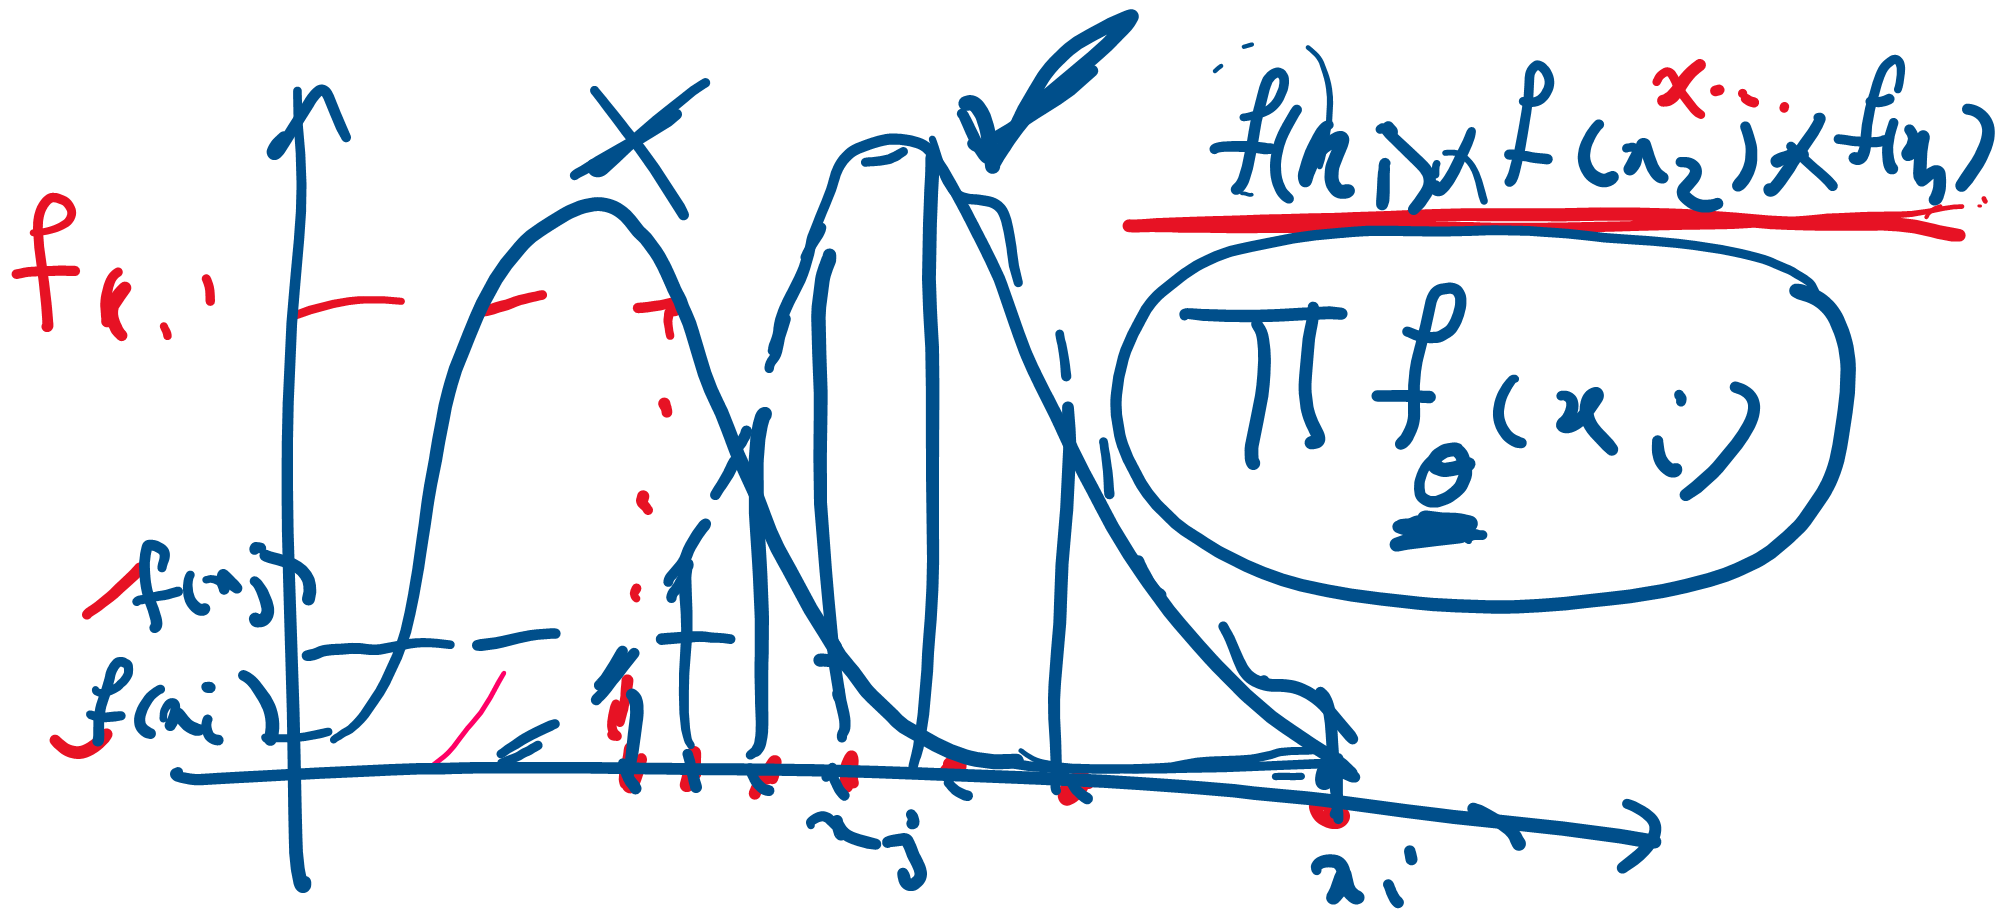

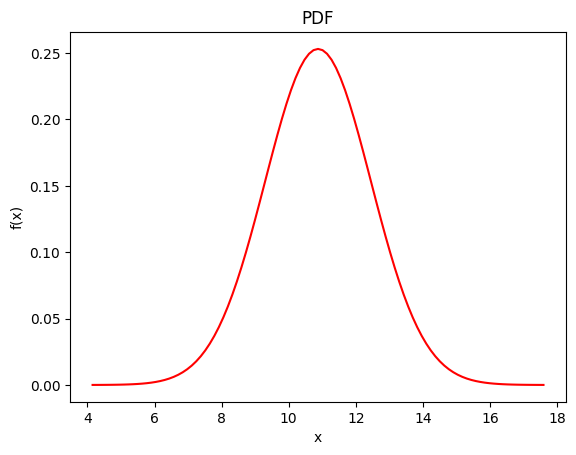

<module 'matplotlib.pyplot' from 'c:\\Users\\naima\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [50]:
mydistribution=dist.fit(a,"norm",method="mm")
mydistribution.plot_pdf()

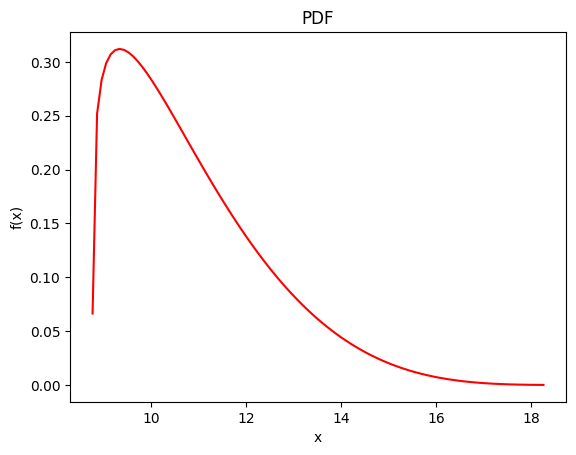

<module 'matplotlib.pyplot' from 'c:\\Users\\naima\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
mydist2=dist.fit(a,"beta",method="mm")
mydist2.plot_pdf()

## Empirical

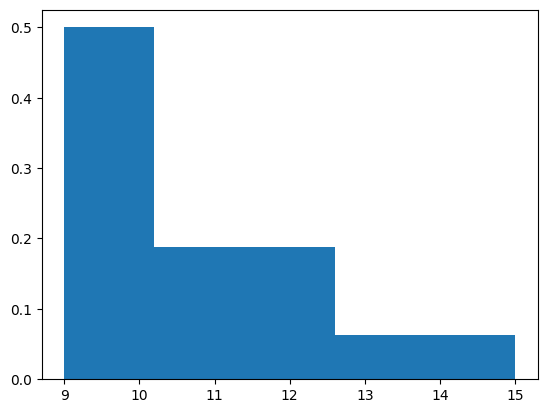

In [37]:
mydist3=dist.empirical(a)
mydist3.plot_pdf()


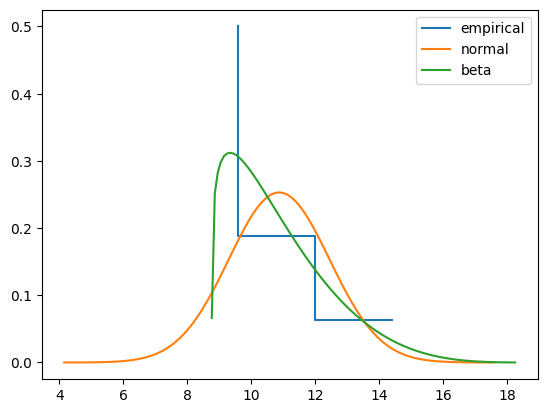

In [34]:
mydist3=dist.empirical(a)
x,y=mydist3.pdf_xy()
plt.step(x,y,label="empirical")
x1,y1=mydistribution.pdf_xy()
plt.plot(x1,y1,label="normal")

x2,y2=mydist2.pdf_xy()
plt.plot(x2,y2,label="beta")
plt.legend()



## Goodness of fit
### Kologomorov-Smirnov(K-S) tes

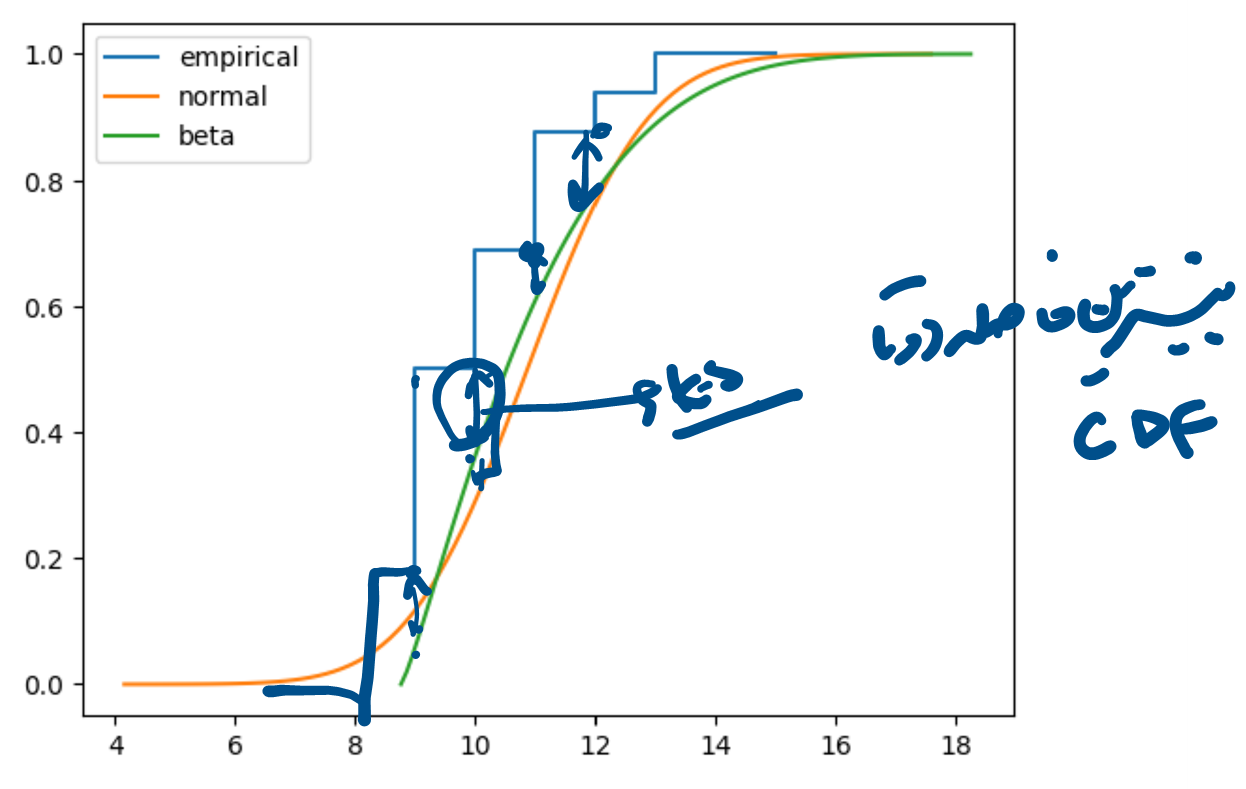

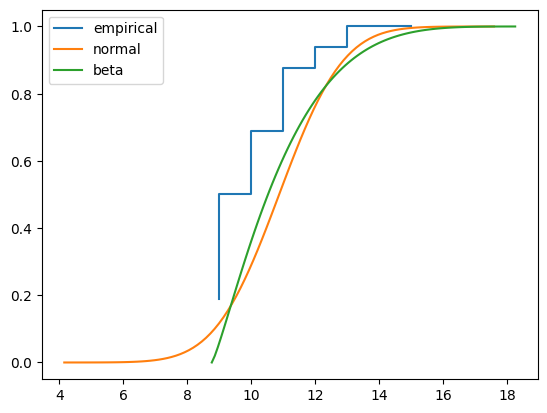

In [46]:
x,y=mydist3.cdf_xy()
plt.step(x,y,label="empirical")

x1,y1=mydistribution.cdf_xy(size=100)
plt.plot(x1,y1,label="normal")

x2,y2=mydist2.cdf_xy(size=100)
plt.plot(x2,y2,label="beta")
plt.legend()



In [51]:
print("K-S value for beta fit:",mydist2.ks)
print("K-S value for noraml fit:",mydistribution.ks)

K-S value for beta fit: 0.17326523891065215
K-S value for noraml fit: 0.21059921733807185


## Class Exe

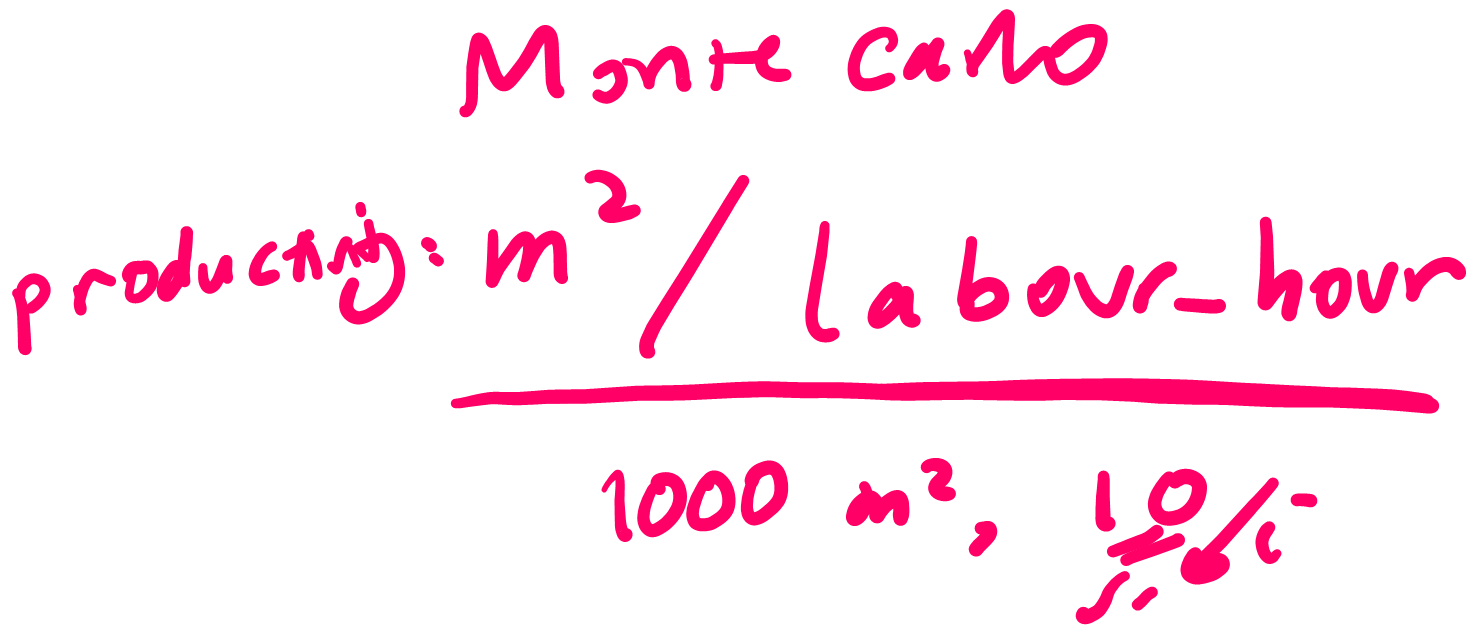


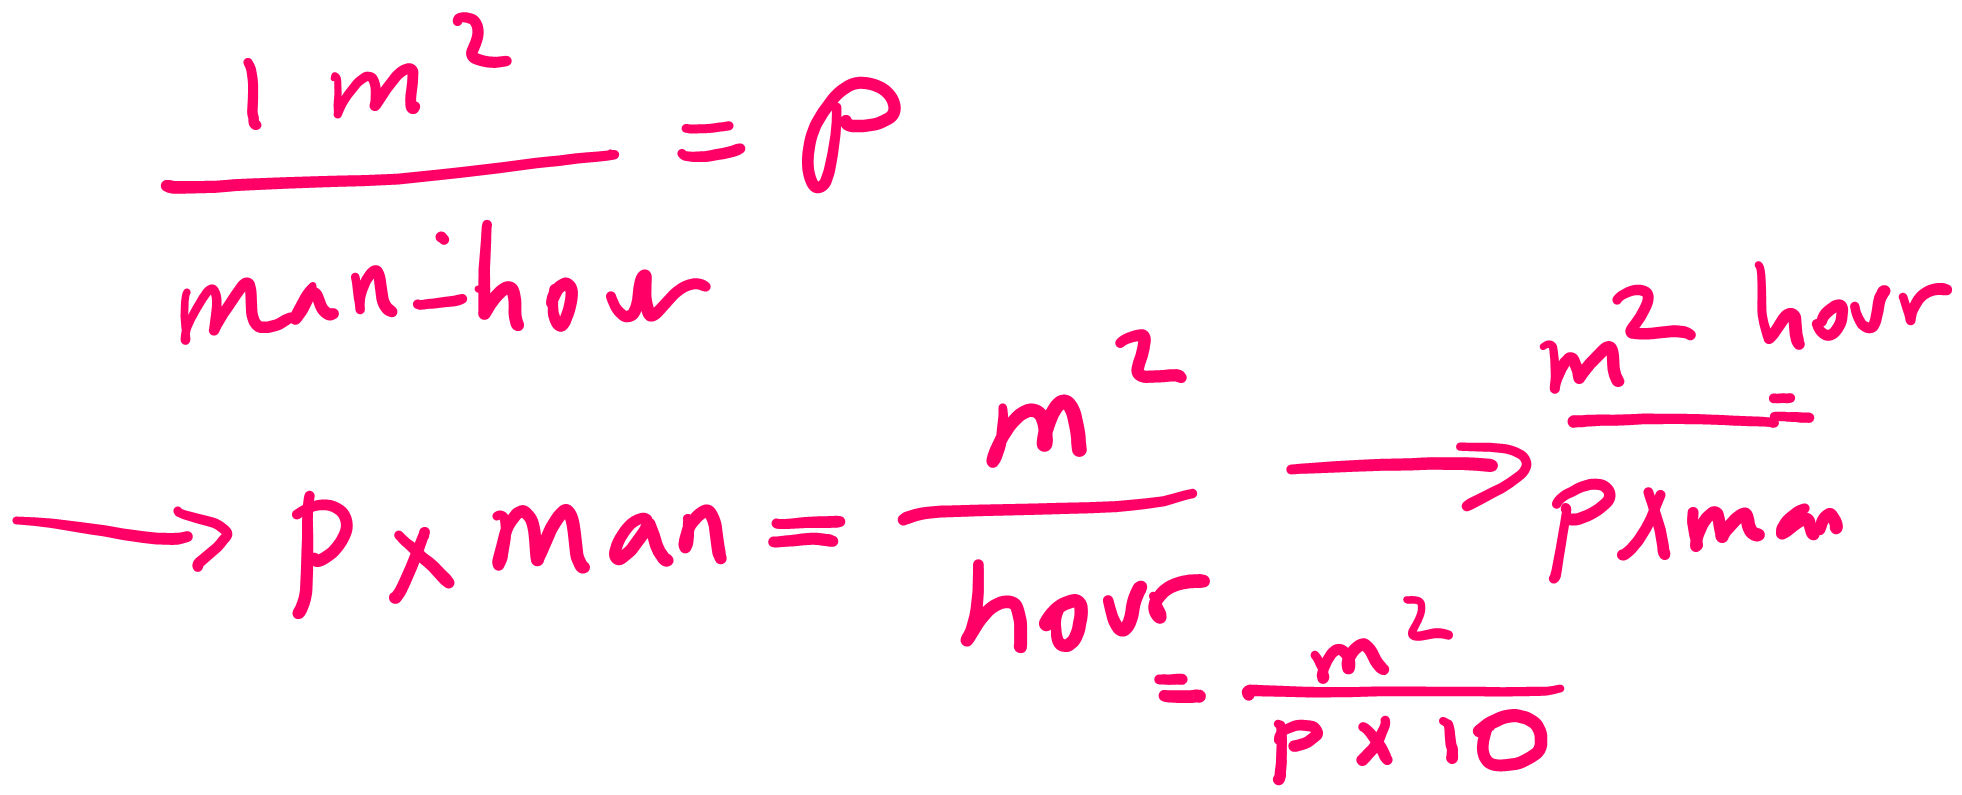

In [64]:
import pandas as pd
mydata=pd.read_csv("ConstructionProductivity.csv")
pdata=mydata["Y"].to_numpy()
pdata


array([0.95, 1.12, 1.01, 1.27, 1.14, 1.17, 1.04, 1.16, 1.99, 1.1 , 1.  ,
       1.12, 1.55, 1.26, 1.14, 1.27, 1.45, 1.51, 1.37, 1.38, 1.25, 1.49,
       1.34, 1.36, 1.22, 1.34, 1.2 , 1.39, 1.41, 1.26, 1.48, 1.36, 1.21,
       1.34, 1.09, 1.21, 1.47, 1.32, 1.37, 1.23, 1.47, 1.34, 1.49, 1.35,
       1.54, 1.38, 1.52, 1.37, 1.67, 1.51, 1.65, 1.48, 1.57, 1.41, 1.56,
       1.4 , 1.63, 1.46, 1.73, 1.89, 1.71, 1.74, 1.55, 1.8 , 1.62, 1.87,
       1.68, 1.67, 1.52, 1.76, 1.98, 1.58, 1.45, 1.26, 2.02, 1.54, 2.4 ,
       1.49, 2.25, 2.2 , 1.62, 1.33, 2.24, 1.75, 1.93, 1.43, 1.65, 1.65,
       1.85, 1.8 , 1.32, 1.55, 1.1 , 1.47, 1.42, 1.49, 1.45, 1.61, 1.52,
       1.76, 1.75, 1.73, 1.91, 1.79, 1.77, 1.8 , 1.42, 1.49, 1.87, 2.  ,
       1.78, 1.36, 2.42, 2.31, 2.09, 1.8 , 1.85, 1.88, 1.78, 2.33, 1.72,
       1.7 , 2.09, 2.32, 2.34, 1.88, 1.9 , 1.65, 2.33, 2.35, 2.4 , 2.38,
       2.4 , 2.53, 2.5 , 1.8 , 1.7 , 2.34, 1.98, 1.74, 1.78, 1.8 , 1.68,
       1.5 , 1.74, 1.82, 1.73, 2.1 , 2.02, 1.91, 1.

<Axes: >

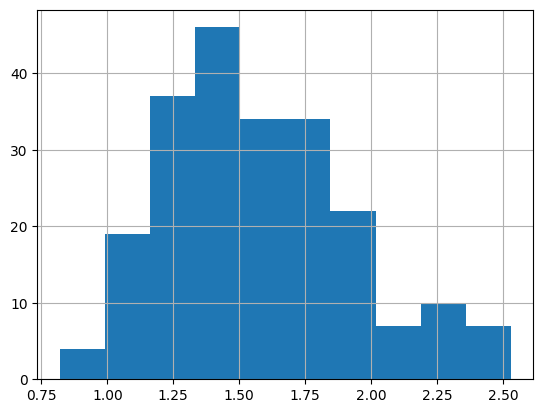

In [65]:
mydata["Y"].hist()

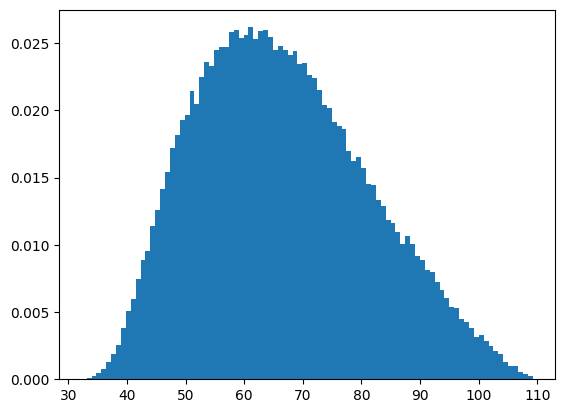

In [75]:
mydist=dist.fit(pdata,"beta",method="mm")
p=mydist.samples(100000)
hours=1000/(p*10)
hoursdist=dist.empirical(hours)
hoursdist.plot_pdf()




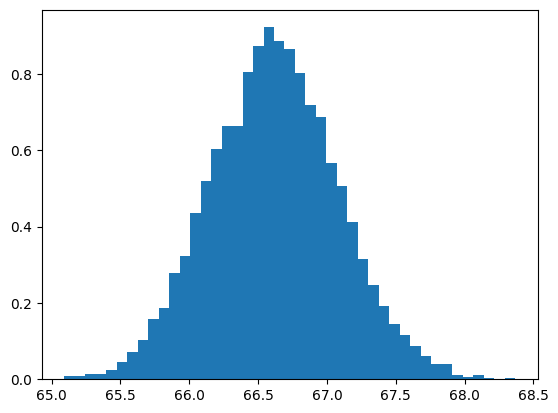

In [76]:
vals=[]
for i in range(10000):
    p=mydist.samples(1000)
    hours=1/(p*10)
    total_hours=np.sum(hours)
    vals.append(total_hours)
hoursdist=dist.empirical(vals)
hoursdist.plot_pdf()
